In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fk = np.random.rand(32,32,256)
wk = np.random.rand(256,1)


In [5]:
def get_sc(fk,wk):
    sc = 0
    sum_fk = np.expand_dims(fk.sum(axis=0).sum(axis=0), axis=1)
    sc = np.matmul(np.transpose(wk,(1,0)),sum_fk)
    return np.squeeze(sc)


In [ ]:
def crm(fk, wk):
    importance = np.zeros(fk.shape)
    sum_fk = np.expand_dims(fk.sum(axis=0).sum(axis=0), axis=1)
    sc = np.matmul(np.transpose(wk,(1,0)),sum_fk)
    for k in range(fk.shape[2]):
        for j in range(fk.shape[1]):
            for i in range(fk.shape[0]):
                temp = fk[i,j,k]
                fk[i,j,k] = 0
                importance[i,j,k] = np.power(sc-get_sc(fk,wk),2)
                fk[i,j,k] = temp

    return importance.sum(axis=-1)/importance.shape[-1]

In [6]:
sc = get_sc(fk,wk)



In [16]:
heatmap = importance.sum(axis=-1)/importance.shape[-1]
heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
heatmap.max()

255

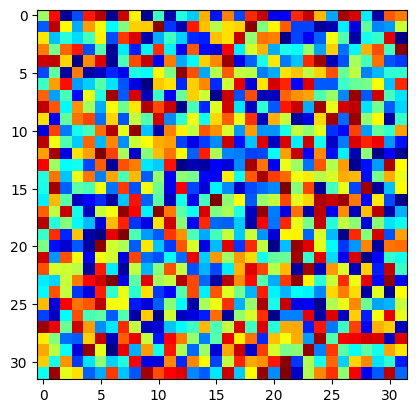

In [14]:
plt.imshow(heatmap)